In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ALLCools.plot import *
from ALLCools.dmr.dmr_lineage_plot import *

## rc

In [2]:
from matplotlib import rc

labelsize = 6
linewidth = 0.6
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)


## Cluster Summary

In [3]:
cell_tidy_data = pd.read_msgpack('/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg')

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
cell_tidy_data.columns

Index(['AllcPath', 'CCC_Rate', 'CG_Rate', 'CG_RateAdj', 'CH_Rate',
       'CH_RateAdj', 'FinalReads', 'InputReads', 'MappedReads', 'Region',
       'index_name', 'uid', 'BamFilteringRate', 'MappingRate', 'Pos96',
       'Plate', 'Col96', 'Row96', 'Col384', 'Row384', 'FACS_Date', 'Slice',
       'MajorRegion', 'SubRegion', 'CellClass', 'l1-umap_0', 'l1-umap_1',
       'l1-tsne_0', 'l1-tsne_1', 'MajorType', 'l2-umap_0', 'l2-umap_1',
       'l2-tsne_0', 'l2-tsne_1', 'SubType', 'l3-umap_0', 'l3-umap_1',
       'l3-tsne_0', 'l3-tsne_1', 'L1CellClass'],
      dtype='object')

In [5]:
cell_tidy_data.head()

,AllcPath,CCC_Rate,CG_Rate,CG_RateAdj,CH_Rate,CH_RateAdj,FinalReads,InputReads,MappedReads,Region,...,l2-umap_0,l2-umap_1,l2-tsne_0,l2-tsne_1,SubType,l3-umap_0,l3-umap_1,l3-tsne_0,l3-tsne_1,L1CellClass
10E_M_0,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.008198,0.822633,0.821166,0.041640,0.033718,1626504.0,4407752,2892347.0,10E,...,-23.368460,-1.151200,-34.021153,-19.429447,MGE-Sst Rxra,-0.766630,-16.704815,20.297781,1.192093,Inh
10E_M_1,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006019,0.743035,0.741479,0.024127,0.018218,2009998.0,5524084,3657352.0,10E,...,-8.322600,-3.988057,19.205085,10.272570,CA3 Cadm2,4.290240,-2.610511,7.860870,8.813396,Exc-HPF
10E_M_10,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006569,0.750172,0.748520,0.027665,0.021235,1383636.0,3455260,2172987.0,10E,...,-7.409779,-4.662556,20.146606,6.345836,CA3 Cadm2,5.852028,-2.510058,12.927795,8.544050,Exc-HPF
10E_M_101,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006353,0.760898,0.759369,0.026547,0.020323,2474670.0,7245482,4778768.0,10E,...,-6.266342,-8.345406,25.465765,-6.767192,CA3 Cadm2,11.189178,-3.763147,29.875836,2.739283,Exc-HPF
10E_M_102,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.005409,0.752980,0.751637,0.019497,0.014164,2430290.0,7004754,4609570.0,10E,...,-1.135772,-17.311239,-7.427455,-20.497435,CA1 Chrm3,2.912797,2.683262,-19.971042,24.551260,Exc-HPF


## Palette

In [6]:
region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_region_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

cell_class_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
major_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()
sub_type_palette = pd.read_csv('/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
                                header=None, index_col=0, squeeze=True).to_dict()

## Dendrogram

In [7]:
linkage = pd.read_csv('./files/MajorType.use_level1_pc.cluster_center.linkage_table.csv',
                      header=None,)
linkage_anno = pd.read_csv('./files/MajorType.use_level1_pc.cluster_center.anno.csv',
                           header=None, index_col=1).index

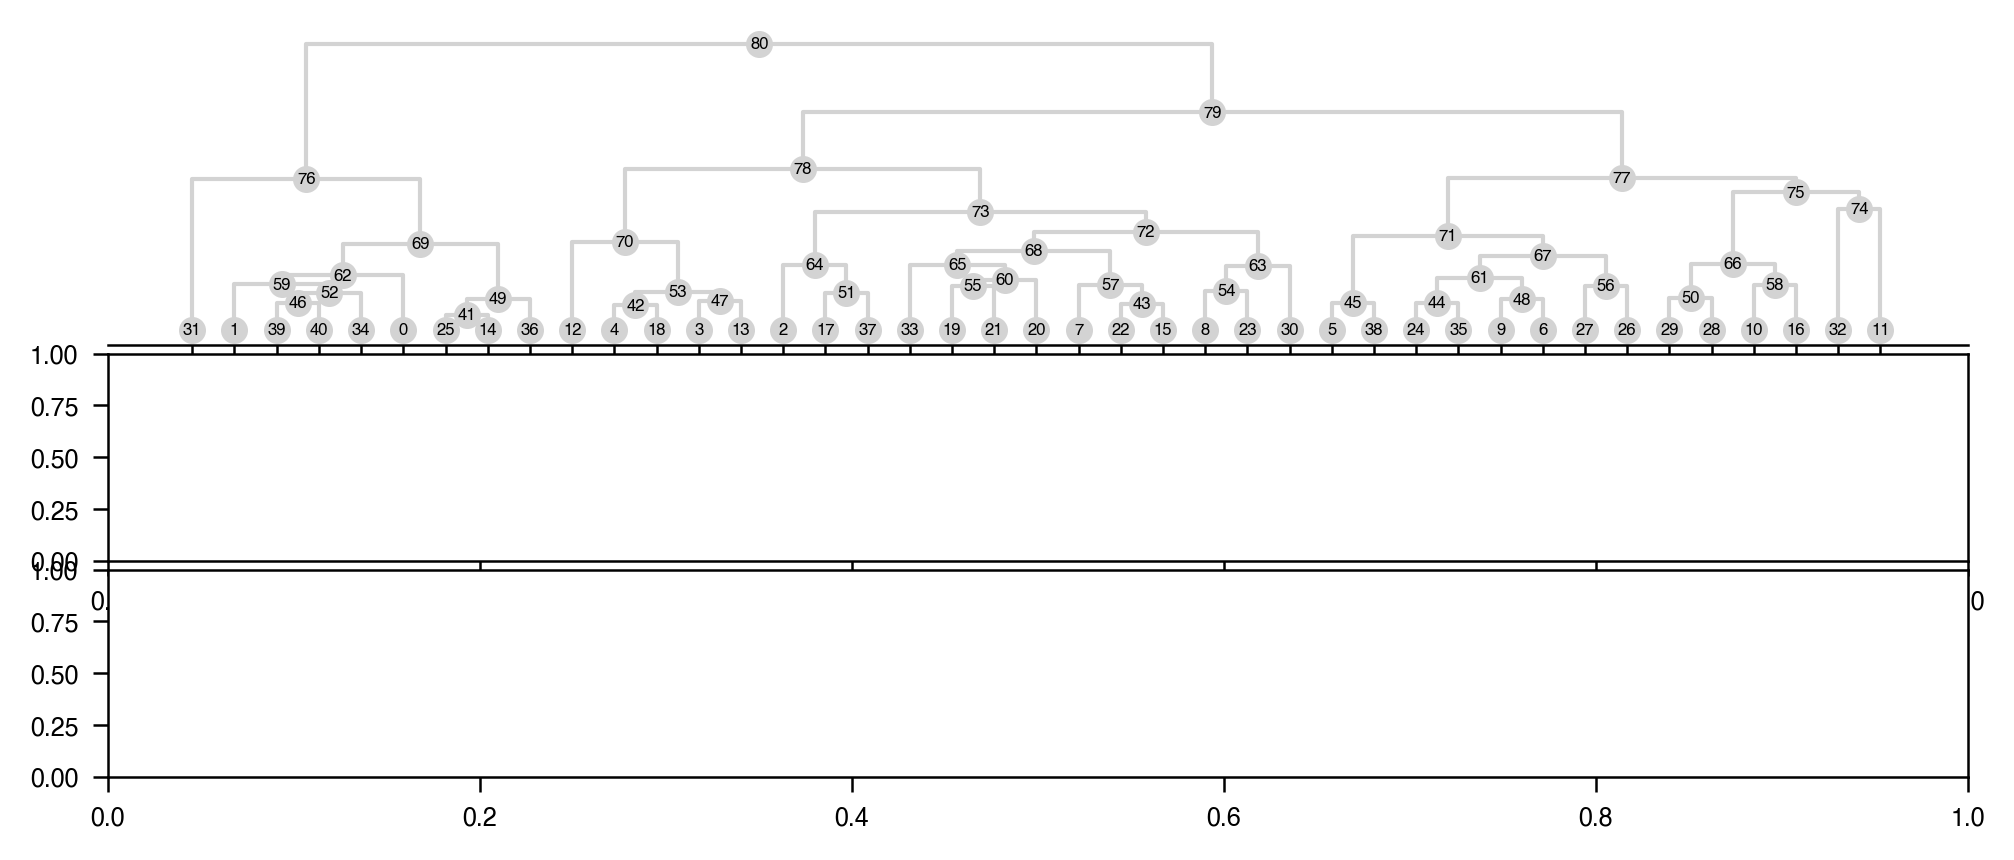

In [11]:
fig = plt.figure(figsize=(8, 3.3), dpi=300)

gs = fig.add_gridspec(14, 1)

ax_tree = fig.add_subplot(gs[:6, 0])
ax_portion = fig.add_subplot(gs[6:10, 0])
ax_entropy = fig.add_subplot(gs[10:14, 0])

node_pos, dendro = plot_dendrogram(
    linkage,
    linkage_anno.tolist(),
    dendro_kws=None,
    ax=ax_tree,
    branch_type='straight',
    plot_node_id=True,
    plot_kws=None,
    node_hue=None,
    node_hue_norm=None,
    palette='viridis',  # shared by both line and node hue
    node_size=None,
    node_size_norm=None,
    line_hue=None,
    line_hue_norm=None,
    sizes=None,
    size=30,
    linewidth=1,
    color=None)

ax_tree.set(xticks=list(range(len(linkage_anno))), xticklabels=[], yticks=[])
ax_tree.xaxis.set_tick_params(rotation=90)
sns.despine(ax=ax_tree, left=True)

pass

In [12]:
type_order = pd.read_csv('./files/MajorType.order_by_dendrogram.txt', index_col=0, header=None).index.tolist()

## Calculate Cell Type Region Portion

In [13]:
cluster_col = 'MajorType'
region_col = 'SubRegion'

region_order = [
    'ACB', 'CP', 'LSX', 'PAL', 'CA', 'CA,DG', 'DG', 'ACA', 'ACA,PL,ILA', 'AI',
    'MOp', 'MOs', 'ORB', 'SSp', 'SSs', 'AON', 'MOB,AON', 'PIR'
]

hue_palette = sub_region_palette
type_palette = major_type_palette

# get data
counts = cell_tidy_data[[cluster_col, region_col]].groupby(cluster_col)[region_col].value_counts()
type_by_region_count = counts.unstack().fillna(0).astype(int)
type_by_region_count = type_by_region_count[region_order].copy()

type_by_region_ratio = type_by_region_count.divide(type_by_region_count.sum(axis=1), axis=0)
type_by_region_ratio_cumsum = np.cumsum(type_by_region_ratio, axis=1)

bar_data = type_by_region_ratio_cumsum.stack().reset_index()
bar_data.columns = [cluster_col, region_col, 'value']

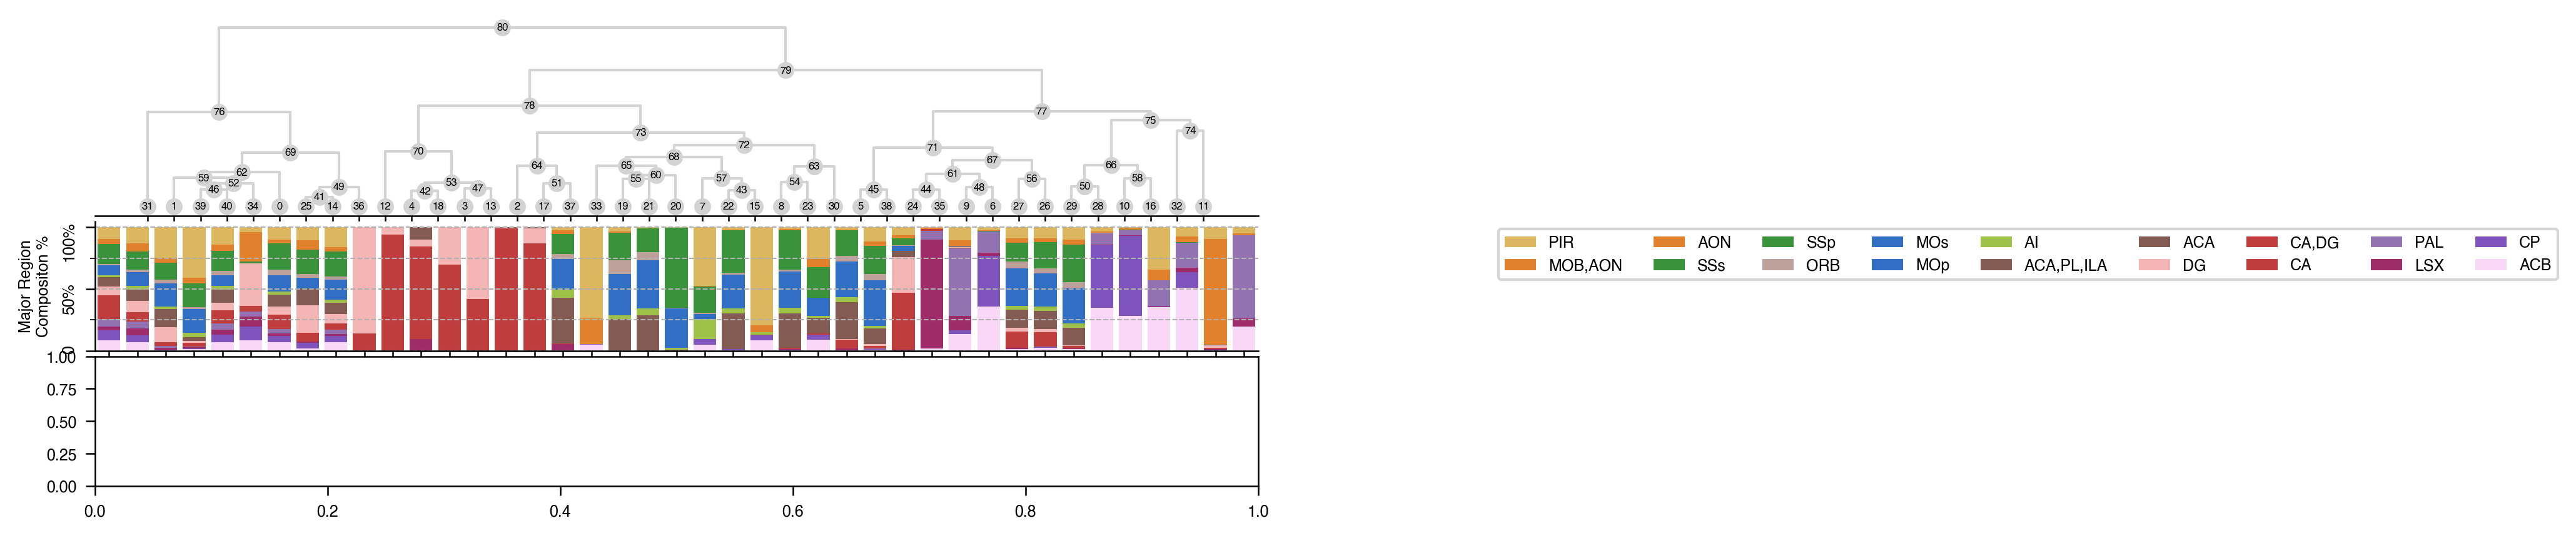

In [14]:
sns.barplot(ax=ax_portion, data=bar_data, 
            x=cluster_col, y='value', order=type_order,
            hue=region_col, dodge=False, palette=hue_palette, 
            hue_order=type_by_region_ratio_cumsum.columns[::-1])

ax_portion.set(xticklabels=[], ylabel='Major Region\nCompositon %', xlabel='')
ax_portion.yaxis.set_ticks([0, 0.5, 1])
ax_portion.yaxis.set_ticklabels(['0', '50%', '100%'])
ax_portion.yaxis.set_tick_params(rotation=90)
ax_portion.yaxis.set_ticks([0.25, 0.75], minor=True)
ax_portion.grid(axis='y', which='both', 
        linestyle='--', linewidth=0.5)
sns.despine(ax=ax_portion)
ax_portion.legend(bbox_to_anchor=(1.2, 1), ncol=9, fontsize=labelsize)

fig

## Calculate Entropy

In [15]:
from scipy.stats import entropy
def calc_entropy(sub_df, col):
    counts = sub_df[col].value_counts().tolist()
    return entropy(counts)

cluster_col = 'MajorType'
region_col = ['MajorRegion', 'SubRegion', 'Region']

bar_data = {}
for col in region_col:
    region_type_entropy = cell_tidy_data.groupby(cluster_col).apply(lambda i: calc_entropy(i, col=col))
    bar_data[col] = region_type_entropy
bar_data = pd.DataFrame(bar_data)
bar_data = bar_data.unstack().reset_index()
bar_data.columns = ['RegionType', 'Cluster', 'Entropy']

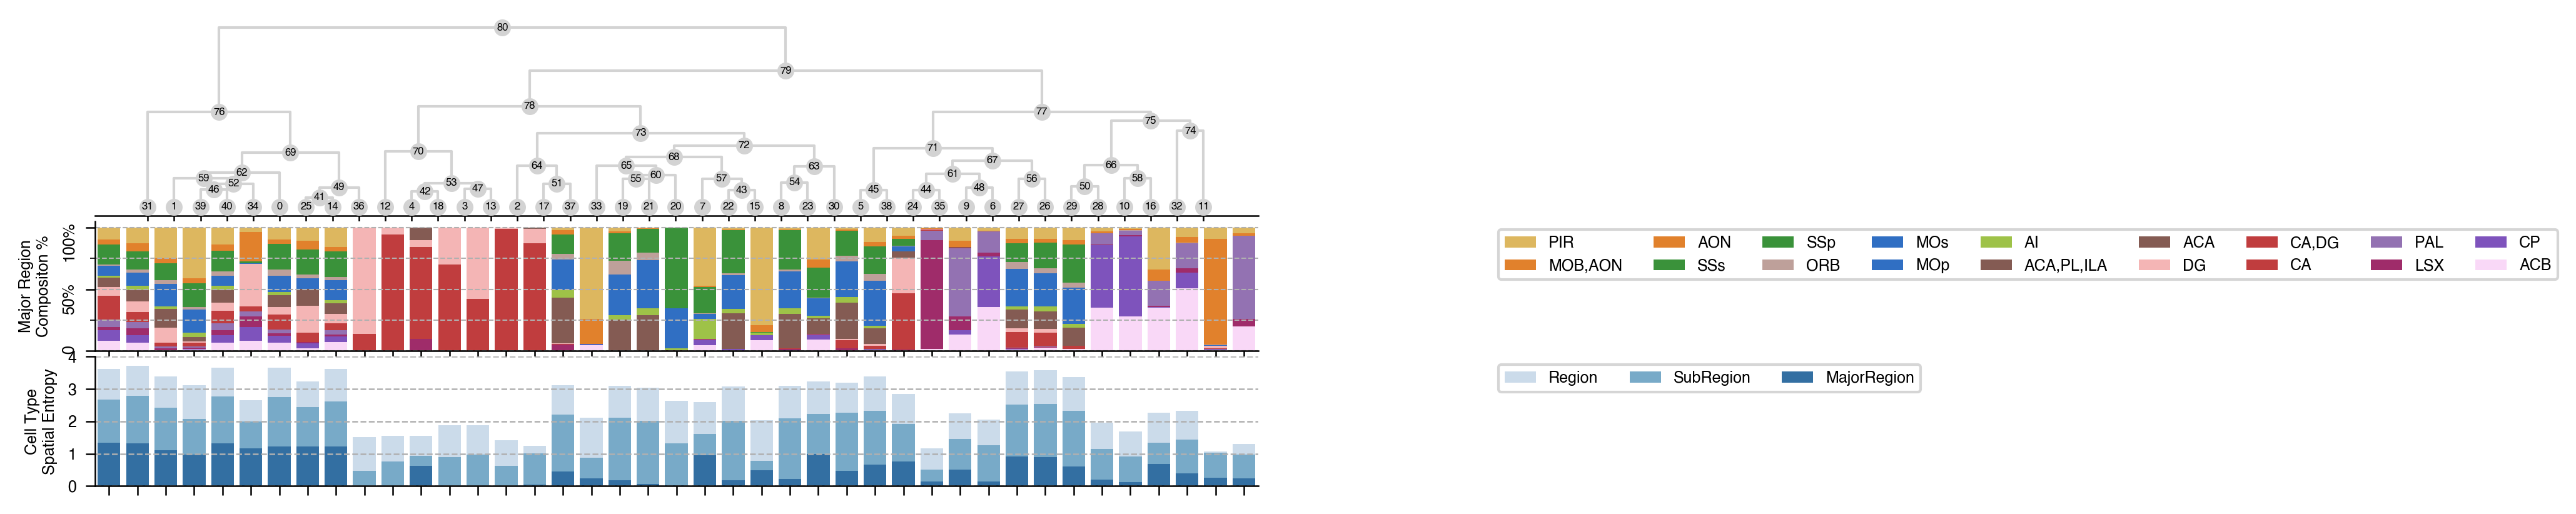

In [16]:
sns.barplot(data=bar_data,
            ax=ax_entropy,
            x='Cluster',
            y='Entropy',
            order=type_order,
            hue='RegionType',
            hue_order=region_col[::-1],
            palette='Blues',
            dodge=False)

ax_entropy.set(xticklabels=[], yticks=[0, 1, 2, 3, 4], xlabel='', ylabel='Cell Type\nSpatial Entropy')
ax_entropy.grid(axis='y', linewidth=linewidth, linestyle='--')
ax_entropy.legend(bbox_to_anchor=(1.2, 1), ncol=3, fontsize=labelsize)
sns.despine(ax=ax_entropy)

fig

## Finalize Figure

In [17]:
ax_tree.set_xlim(ax_portion.get_xlim())

(-0.5, 40.5)

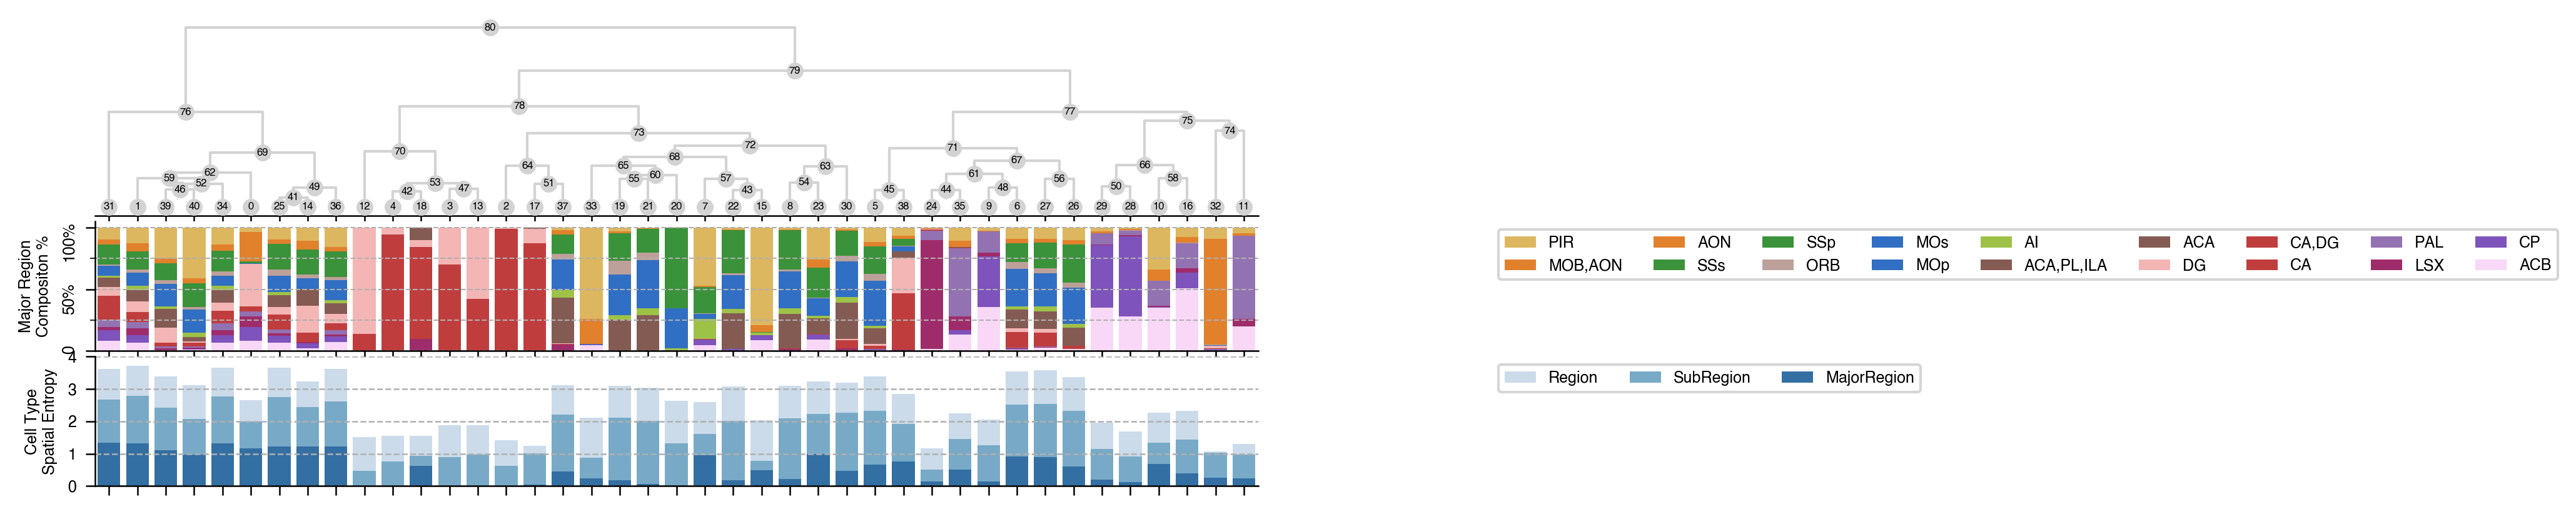

In [18]:
fig.savefig('files/major_type_tree_bar_compound.pdf', bbox_inches='tight')
fig

## Text anno figure

In [19]:
cluster_cell_count = cell_tidy_data['MajorType'].value_counts()
cluster_sub_cluster_count = cell_tidy_data.groupby('MajorType')['SubType'].apply(lambda i: i.unique().size)

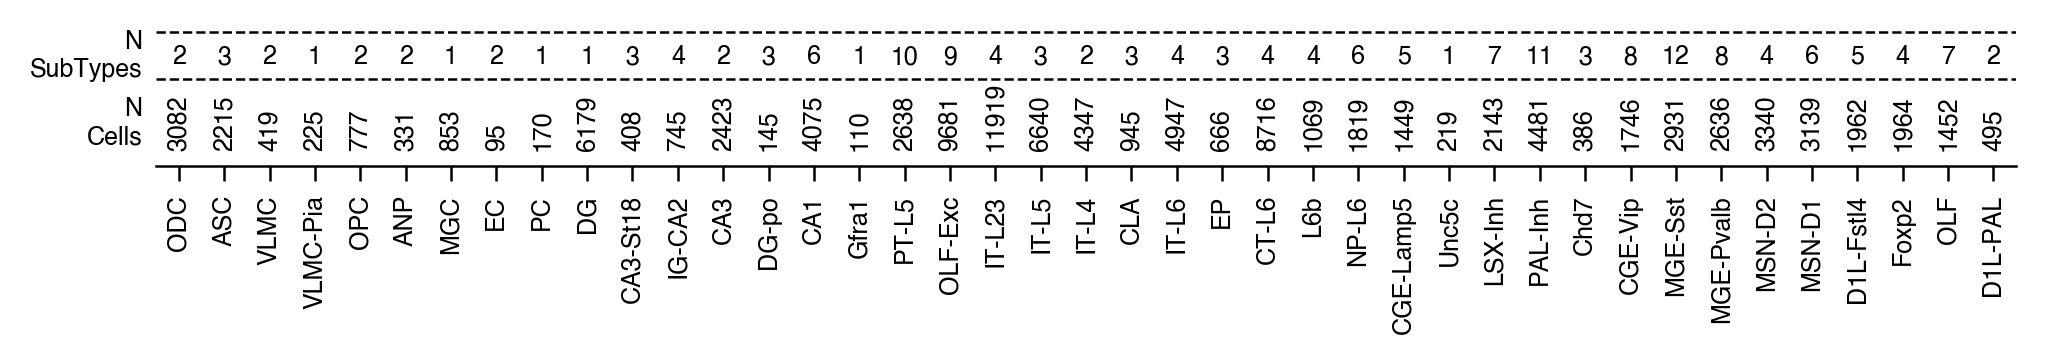

In [27]:
fig, ax = plt.subplots(figsize=(8, 0.6), dpi=300)

ax.set_xlim(ax_entropy.get_xlim())
sns.despine(ax=ax, left=True, bottom=False)
ax.set(xticks=list(range(len(cluster_cell_count))), xticklabels=type_order,
       yticks=[])
ax.xaxis.set_tick_params(rotation=90)
for i, cell_type in enumerate(type_order):
    ax.text(i, 0.1, cluster_cell_count[cell_type], 
            rotation=90, fontsize=labelsize, ha='center',)
    ax.text(i, 0.5, cluster_sub_cluster_count[cell_type], 
            rotation=0, fontsize=labelsize, ha='center')
ax.axhline(0.43, linestyle='--', c='k')
ax.axhline(0.66, linestyle='--', c='k')
ax.set_ylim(0, 0.67)

ax.text(-0.8, 0.54, 'N\nSubTypes', fontsize=labelsize, ha='right', va='center')
ax.text(-0.8, 0.21, 'N\nCells', fontsize=labelsize, ha='right', va='center')


fig.savefig('files/major_type_tree_bar_compound.text_labels.pdf', bbox_inches='tight')
